import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = 'sua_chave_api_openweather'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'São Paulo'  # Exemplo de localização
data = get_weather_data(location)


In [32]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'Amazonas'  # Exemplo de localização
data = get_weather_data(location)


In [33]:
def process_weather_data(data):
    if data.get('cod') != 200:
        raise ValueError("Erro ao obter dados: {}".format(data.get('message')))
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h
    return {
        'Temperature': temp,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Precipitation': precipitation
    }

weather_info = process_weather_data(data)
df = pd.DataFrame([weather_info])


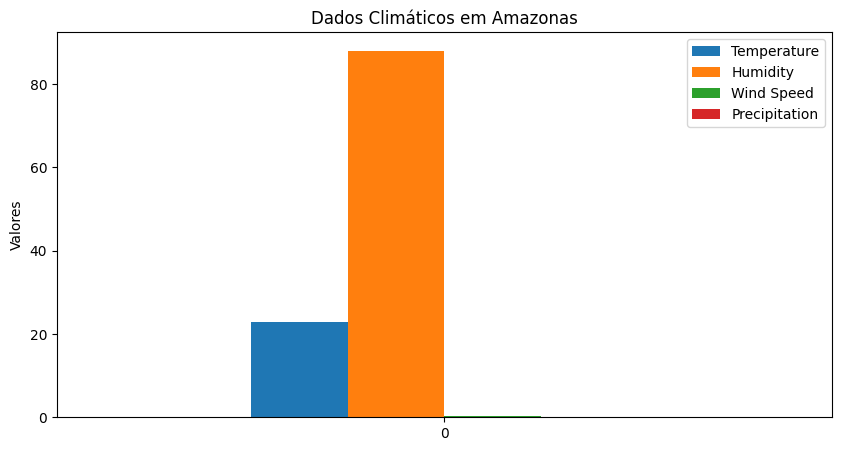

In [34]:
# Gráfico de Temperatura, Umidade, Velocidade do Vento e Precipitação
df.plot(kind='bar', figsize=(10, 5))
plt.title('Dados Climáticos em {}'.format(location))
plt.ylabel('Valores')
plt.xticks(rotation=0)
plt.show()


In [35]:
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Calcule o FWI e imprima
fwi = calculate_fwi(
    df['Temperature'].values[0],
    df['Humidity'].values[0],
    df['Wind Speed'].values[0],
    df['Precipitation'].values[0]
)

print("FWI:", fwi)
print("Risco de Queimadas:", "Alto" if fwi > 15 else "Baixo")


FWI: 0.27292122
Risco de Queimadas: Baixo


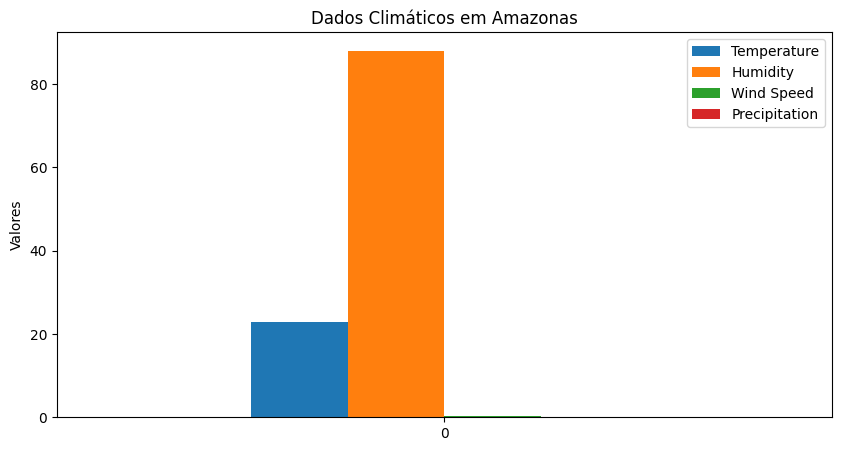

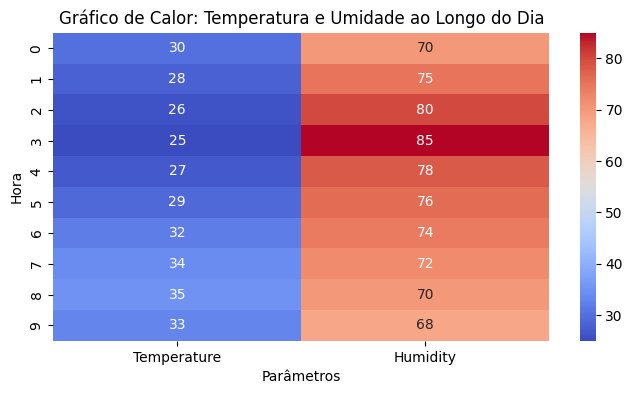

In [39]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importando seaborn

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

# Colete os dados para uma localização específica
location = 'Amazonas'  # Exemplo de localização
data = get_weather_data(location)

def process_weather_data(data):
    if data.get('cod') != 200:
        raise ValueError("Erro ao obter dados: {}".format(data.get('message')))
    
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h
    return {
        'Temperature': temp,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Precipitation': precipitation
    }

weather_info = process_weather_data(data)
df = pd.DataFrame([weather_info])

# Gráfico de Temperatura, Umidade, Velocidade do Vento e Precipitação
df.plot(kind='bar', figsize=(10, 5))
plt.title('Dados Climáticos em {}'.format(location))
plt.ylabel('Valores')
plt.xticks(rotation=0)
plt.show()

# Simulando múltiplos dados para o gráfico de calor
heatmap_data = pd.DataFrame({
    'Hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
    'Temperature': [30, 28, 26, 25, 27, 29, 32, 34, 35, 33],
    'Humidity': [70, 75, 80, 85, 78, 76, 74, 72, 70, 68]
})

heatmap_data.set_index('Hour', inplace=True)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Gráfico de Calor: Temperatura e Umidade ao Longo do Dia')
plt.xlabel('Parâmetros')
plt.ylabel('Hora')
plt.show()


In [1]:
from fastapi import FastAPI
import requests
import pandas
import matplotlib.pyplot as plt

app = FastAPI()

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

@app.get("/fwi/{location}")
def get_fwi(location: str):
    # Faz a chamada à API do OpenWeatherMap para obter dados climáticos ao vivo
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        return {"error": "Não foi possível obter dados para a localização fornecida."}

    data = response.json()

    # Verifica se os dados foram retornados corretamente
    if 'main' not in data or 'wind' not in data:
        return {"error": "Dados climáticos não disponíveis."}

    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    return {
        'location': location,
        'temperature': temp,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'precipitation': precipitation,
        'FWI': fwi,
        'fire_risk': fire_risk
    }

In [2]:
from fastapi import FastAPI
import requests
import pandas as pd
import matplotlib.pyplot as plt
import io
from fastapi.responses import StreamingResponse

app = FastAPI()

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

@app.get("/fwi/{location}")
def get_fwi(location: str):
    # Faz a chamada à API do OpenWeatherMap para obter dados climáticos ao vivo
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        return {"error": "Não foi possível obter dados para a localização fornecida."}

    data = response.json()

    # Verifica se os dados foram retornados corretamente
    if 'main' not in data or 'wind' not in data:
        return {"error": "Dados climáticos não disponíveis."}

    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    # Criar gráfico com todos os dados
    df = pd.DataFrame({
        'Parâmetros': ['Temperatura', 'Umidade', 'Velocidade do Vento', 'Precipitação', 'FWI'],
        'Valores': [temp, humidity, wind_speed, precipitation, fwi]
    })

    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', x='Parâmetros', y='Valores', ax=ax, color='skyblue', legend=False)
    ax.set_ylabel('Valores')
    ax.set_title(f'Dados Climáticos em {location}')

    # Salvar o gráfico em um buffer de bytes
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    return StreamingResponse(buf, media_type="image/png")


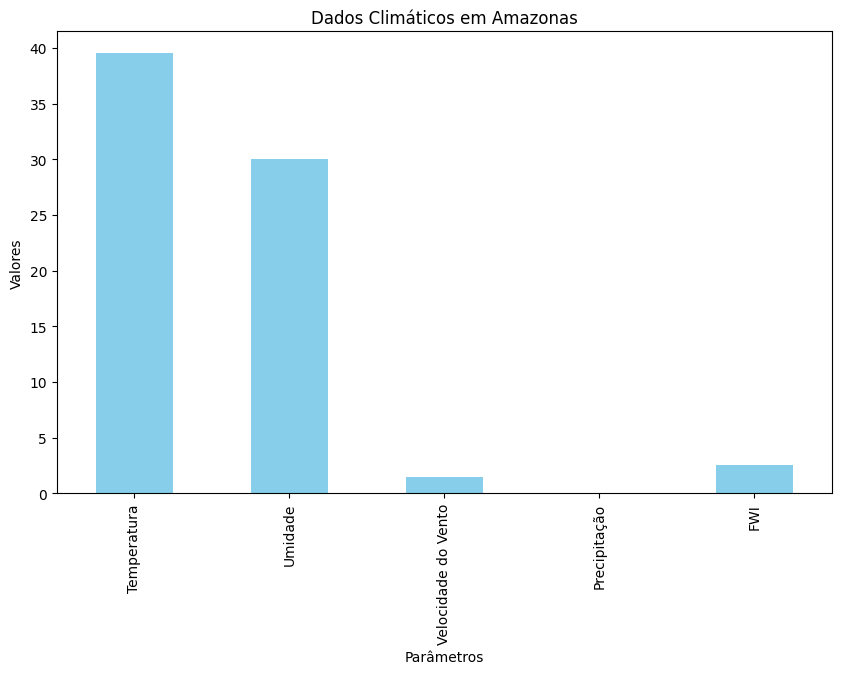

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import io

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

# Função para coletar dados climáticos
def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print("Erro ao obter dados para a localização fornecida.")
        return None

    return response.json()

# Processar dados
location = 'Amazonas'  # Altere a localização conforme necessário
data = get_weather_data(location)

if data:
    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    # Criar gráfico com todos os dados
    df = pd.DataFrame({
        'Parâmetros': ['Temperatura', 'Umidade', 'Velocidade do Vento', 'Precipitação', 'FWI'],
        'Valores': [temp, humidity, wind_speed, precipitation, fwi]
    })

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', x='Parâmetros', y='Valores', ax=ax, color='skyblue', legend=False)
    ax.set_ylabel('Valores')
    ax.set_title(f'Dados Climáticos em {location}')
    
    plt.show()


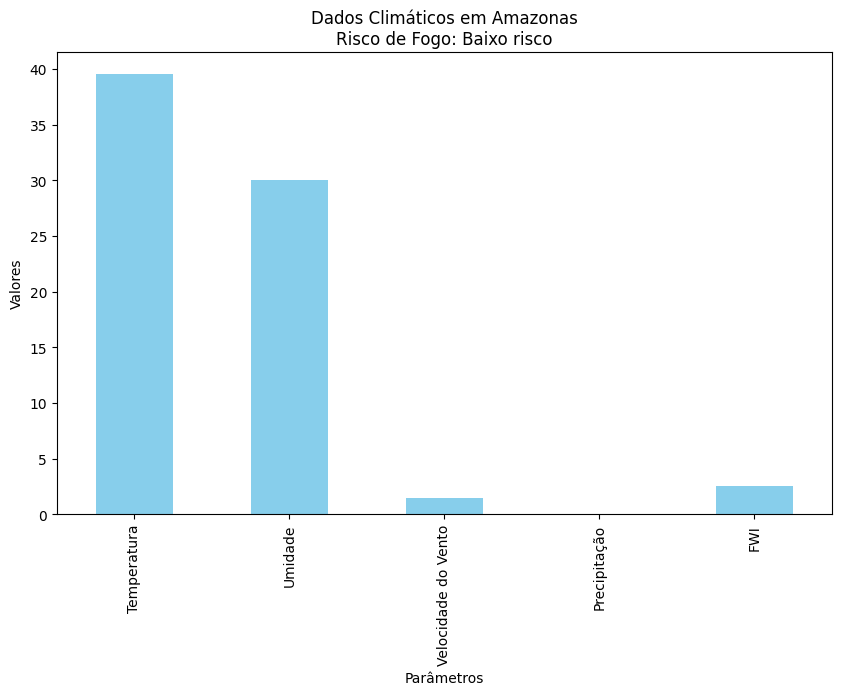

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

# Função para coletar dados climáticos
def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print("Erro ao obter dados para a localização fornecida.")
        return None

    return response.json()

# Processar dados
location = 'Amazonas'  # Altere a localização conforme necessário
data = get_weather_data(location)

if data:
    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    # Criar gráfico com todos os dados
    df = pd.DataFrame({
        'Parâmetros': ['Temperatura', 'Umidade', 'Velocidade do Vento', 'Precipitação', 'FWI'],
        'Valores': [temp, humidity, wind_speed, precipitation, fwi]
    })

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', x='Parâmetros', y='Valores', ax=ax, color='skyblue', legend=False)
    ax.set_ylabel('Valores')

    # Adicionar informação sobre o risco de fogo no título
    ax.set_title(f'Dados Climáticos em {location}\nRisco de Fogo: {fire_risk}')
    
    plt.show()


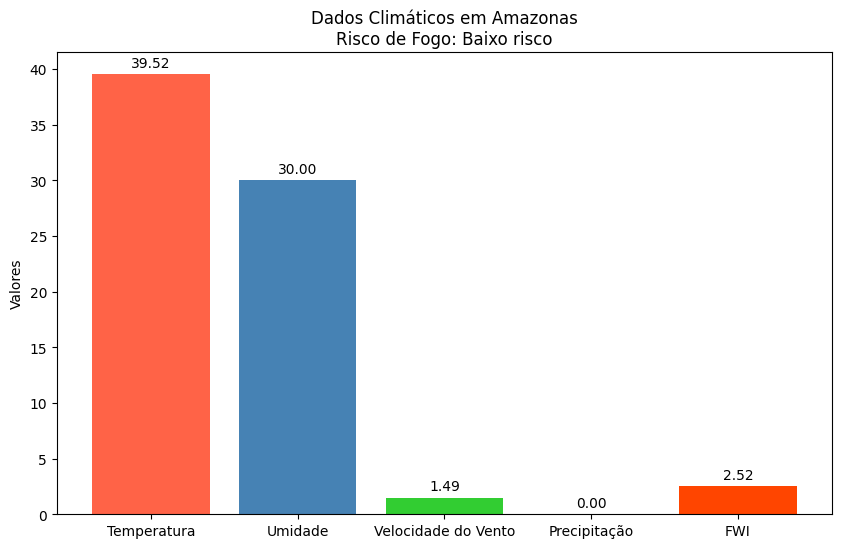

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

# Função para coletar dados climáticos
def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print("Erro ao obter dados para a localização fornecida.")
        return None

    return response.json()

# Processar dados
location = 'Amazonas'  # Altere a localização conforme necessário
data = get_weather_data(location)

if data:
    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    # Criar dataframe com todos os dados
    df = pd.DataFrame({
        'Parâmetros': ['Temperatura', 'Umidade', 'Velocidade do Vento', 'Precipitação', 'FWI'],
        'Valores': [temp, humidity, wind_speed, precipitation, fwi]
    })

    # Definir cores diferentes para cada barra
    colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF4500']  # Cores para cada barra

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(df['Parâmetros'], df['Valores'], color=colors)

    # Adicionar números ao lado das barras
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Adiciona o valor com duas casas decimais
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Posição do texto
                    xytext=(0, 3),  # Deslocamento do texto em relação à barra
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_ylabel('Valores')

    # Adicionar informação sobre o risco de fogo no título
    ax.set_title(f'Dados Climáticos em {location}\nRisco de Fogo: {fire_risk}')
    
    plt.show()


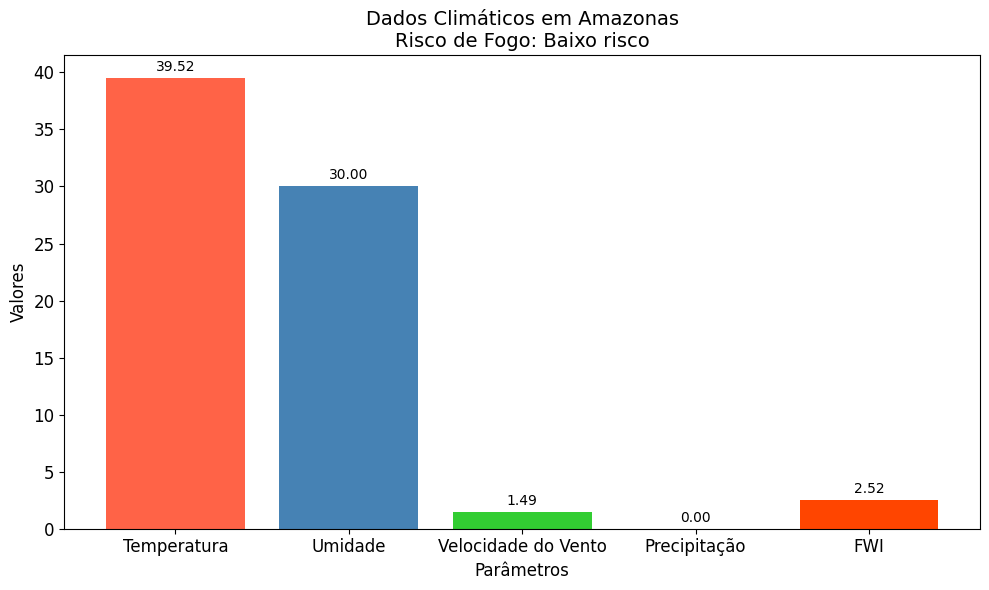

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = '442a1ac939e50a654bbd2770df6d28d4'  # Substitua pela sua chave
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

# Função para calcular o FWI (simplificado)
def calculate_fwi(temp, humidity, wind_speed, precipitation):
    FFMC = 101 - (humidity / 10)
    DMC = 0.5 * (temp - 5)
    DC = 2 * (temp - 5)
    ISI = (FFMC * wind_speed) / 100
    BUI = DMC + DC
    FWI = ISI * (BUI / 50)
    return FWI

# Função para determinar o risco de queimadas
def assess_fire_risk(fwi):
    if fwi < 5:
        return "Baixo risco"
    elif 5 <= fwi < 15:
        return "Risco moderado"
    else:
        return "Alto risco"

# Função para coletar dados climáticos
def get_weather_data(location):
    params = {
        'q': location,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code != 200:
        print("Erro ao obter dados para a localização fornecida.")
        return None

    return response.json()

# Processar dados
location = 'Amazonas'  # Altere a localização conforme necessário
data = get_weather_data(location)

if data:
    # Extração de dados climáticos
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    precipitation = data.get('rain', {}).get('1h', 0)  # Precipitação na última 1h

    # Cálculo do FWI
    fwi = calculate_fwi(temp, humidity, wind_speed, precipitation)
    fire_risk = assess_fire_risk(fwi)

    # Criar dataframe com todos os dados
    df = pd.DataFrame({
        'Parâmetros': ['Temperatura', 'Umidade', 'Velocidade do Vento', 'Precipitação', 'FWI'],
        'Valores': [temp, humidity, wind_speed, precipitation, fwi]
    })

    # Definir cores diferentes para cada barra
    colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF4500']  # Cores para cada barra

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(df['Parâmetros'], df['Valores'], color=colors)

    # Adicionar números ao lado das barras
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Adiciona o valor com duas casas decimais
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Posição do texto
                    xytext=(0, 3),  # Deslocamento do texto em relação à barra
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_ylabel('Valores', fontsize=12)
    ax.set_xlabel('Parâmetros', fontsize=12)
    
    # Adicionar informação sobre o risco de fogo no título
    ax.set_title(f'Dados Climáticos em {location}\nRisco de Fogo: {fire_risk}', fontsize=14)
    
    plt.xticks(fontsize=12)  # Aumentar tamanho dos rótulos do eixo X
    plt.yticks(fontsize=12)  # Aumentar tamanho dos rótulos do eixo Y

    plt.tight_layout()  # Ajustar layout para evitar sobreposição
    plt.show()


In [13]:
print(df)

            Parâmetros    Valores
0          Temperatura  39.520000
1              Umidade  30.000000
2  Velocidade do Vento   1.490000
3         Precipitação   0.000000
4                  FWI   2.520305


In [14]:
statistics = df['Valores'].describe()
print(statistics)

count     5.000000
mean     14.706061
std      18.635056
min       0.000000
25%       1.490000
50%       2.520305
75%      30.000000
max      39.520000
Name: Valores, dtype: float64


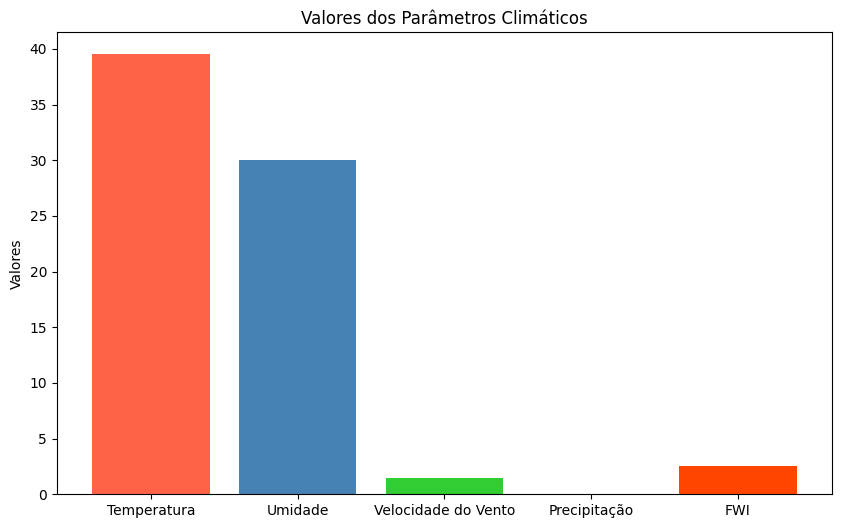

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(df['Parâmetros'], df['Valores'], color=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF4500'])
plt.ylabel('Valores')
plt.title('Valores dos Parâmetros Climáticos')
plt.show()